In [57]:
# HIDDEN
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__

'0.15.0'

In [58]:
import sys
sys.path.append(".")
from timetable import TimeTable

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

import os
import datetime

# Tools for working with timestamps
day_fmt = "%Y-%m-%d"

def less_day(day1, day2):
    """Return day1 < day2"""
    return datetime.datetime.strptime(day1, day_fmt) < datetime.datetime.strptime(day2, day_fmt)

def format_day(day):
    """Return day """
    date =  datetime.datetime.strptime(day, day_fmt)
    return datetime.datetime.strftime(date, day_fmt)

def inc_day(day, ndays=1):
    """Return day + ndays"""
    date =  datetime.datetime.strptime(day, day_fmt) + datetime.timedelta(days=ndays)
    return datetime.datetime.strftime(date, day_fmt)


In [59]:
#URL for https://github.com/nytimes/covid-19-data/blob/master/us-states.csv

countyURL = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

In [60]:
raw_counties = Table.read_table(countyURL)

In [61]:
states = list(np.unique(raw_counties['state']))

In [62]:
#state = 'California'
state = 'New York'

In [63]:
raw_state = raw_counties.where('state', state)
counties = list(np.unique(raw_state['county']))
cases = TimeTable.from_table(raw_state.pivot('county', 'date', 'cases', sum), time_col = 'date', 
                             time_less_fun=less_day)
deaths = TimeTable.from_table(raw_state.pivot('county', 'date', 'deaths', sum), time_col = 'date',
                             time_less_fun=less_day)

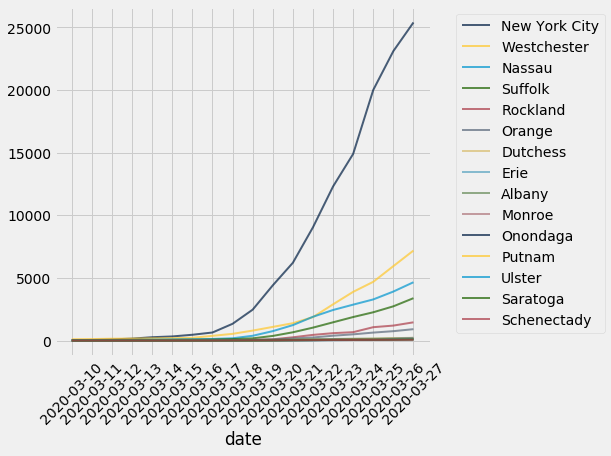

In [64]:
cases.top(15).following('2020-03-10').oplot(height=6, width=6)
_ = plots.xticks(rotation=45)

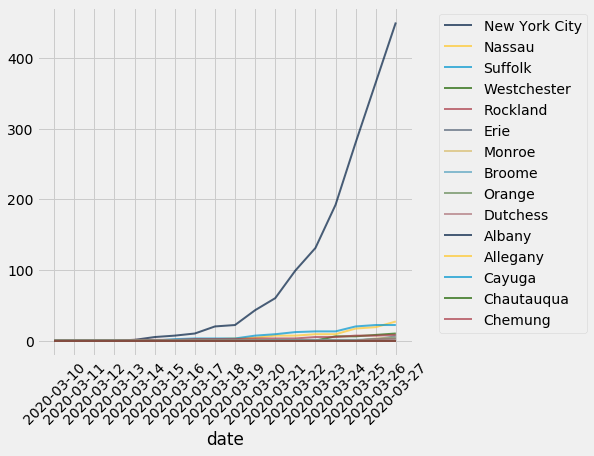

In [65]:
deaths.top(15).following('2020-03-10').oplot(height=6, width=6)
_ = plots.xticks(rotation=45)

In [66]:
cases.order_cols().trend().take[-7:]

date,New York City,new New York City,% newNew York City,rate New York City,Westchester,new Westchester,% newWestchester,rate Westchester,Nassau,new Nassau,% newNassau,rate Nassau,Suffolk,new Suffolk,% newSuffolk,rate Suffolk,Rockland,new Rockland,% newRockland,rate Rockland,Orange,new Orange,% newOrange,rate Orange,Dutchess,new Dutchess,% newDutchess,rate Dutchess,Erie,new Erie,% newErie,rate Erie,Albany,new Albany,% newAlbany,rate Albany,Monroe,new Monroe,% newMonroe,rate Monroe,Onondaga,new Onondaga,% newOnondaga,rate Onondaga,Putnam,new Putnam,% newPutnam,rate Putnam,Ulster,new Ulster,% newUlster,rate Ulster,Saratoga,new Saratoga,% newSaratoga,rate Saratoga,Schenectady,new Schenectady,% newSchenectady,rate Schenectady,Sullivan,new Sullivan,% newSullivan,rate Sullivan,Rensselaer,new Rensselaer,% newRensselaer,rate Rensselaer,Tompkins,new Tompkins,% newTompkins,rate Tompkins,Niagara,new Niagara,% newNiagara,rate Niagara,Columbia,new Columbia,% newColumbia,rate Columbia,Broome,new Broome,% newBroome,rate Broome,Madison,new Madison,% newMadison,rate Madison,Ontario,new Ontario,% newOntario,rate Ontario,Oneida,new Oneida,% newOneida,rate Oneida,Steuben,new Steuben,% newSteuben,rate Steuben,Chemung,new Chemung,% newChemung,rate Chemung,Clinton,new Clinton,% newClinton,rate Clinton,Wayne,new Wayne,% newWayne,rate Wayne,Herkimer,new Herkimer,% newHerkimer,rate Herkimer,Delaware,new Delaware,% newDelaware,rate Delaware,Warren,new Warren,% newWarren,rate Warren,Wyoming,new Wyoming,% newWyoming,rate Wyoming,Genesee,new Genesee,% newGenesee,rate Genesee,Greene,new Greene,% newGreene,rate Greene,Washington,new Washington,% newWashington,rate Washington,Montgomery,new Montgomery,% newMontgomery,rate Montgomery,Otsego,new Otsego,% newOtsego,rate Otsego,Chenango,new Chenango,% newChenango,rate Chenango,Cortland,new Cortland,% newCortland,rate Cortland,Essex,new Essex,% newEssex,rate Essex,Oswego,new Oswego,% newOswego,rate Oswego,Jefferson,new Jefferson,% newJefferson,rate Jefferson,Livingston,new Livingston,% newLivingston,rate Livingston,Orleans,new Orleans,% newOrleans,rate Orleans,Schoharie,new Schoharie,% newSchoharie,rate Schoharie,St. Lawrence,new St. Lawrence,% newSt. Lawrence,rate St. Lawrence,Allegany,new Allegany,% newAllegany,rate Allegany,Cayuga,new Cayuga,% newCayuga,rate Cayuga,Franklin,new Franklin,% newFranklin,rate Franklin,Hamilton,new Hamilton,% newHamilton,rate Hamilton,Tioga,new Tioga,% newTioga,rate Tioga,Chautauqua,new Chautauqua,% newChautauqua,rate Chautauqua,Fulton,new Fulton,% newFulton,rate Fulton
2020-03-21,6211,1803,29.03%,1.40903,1387,296,21.34%,1.27131,1234,480,38.90%,1.6366,662,291,43.96%,1.78437,262,161,61.45%,2.59406,163,79,48.47%,1.94048,49,13,26.53%,1.36111,38,7,18.42%,1.22581,88,27,30.68%,1.44262,42,10,23.81%,1.3125,17,9,52.94%,2.125,22,15,68.18%,3.14286,18,6,33.33%,1.5,35,11,31.43%,1.45833,32,11,34.38%,1.52381,12,4,33.33%,1.5,20,12,60.00%,2.5,11,4,36.36%,1.57143,4,1,25.00%,1.33333,2,1,50.00%,2,2,0,0.00%,1,0,0,nan%,nan,4,1,25.00%,1.33333,4,2,50.00%,2,2,2,100.00%,inf,0,0,nan%,nan,4,2,50.00%,2,3,2,66.67%,3,3,1,33.33%,1.5,1,0,0.00%,1,1,0,0.00%,1,2,0,0.00%,1,1,0,0.00%,1,2,0,0.00%,1,1,0,0.00%,1,3,1,33.33%,1.5,0,0,nan%,nan,2,0,0.00%,1,0,0,nan%,nan,2,1,50.00%,2,0,0,nan%,nan,1,0,0.00%,1,2,1,50.00%,2,0,0,nan%,nan,1,0,0.00%,1,0,0,nan%,nan,2,0,0.00%,1,0,0,nan%,nan,0,0,nan%,nan,2,0,0.00%,1,1,0,0.00%,1,0,0,nan%,nan,1,0,0.00%,1
2020-03-22,9045,2834,31.33%,1.45629,1873,486,25.95%,1.3504,1900,666,35.05%,1.53971,1034,372,35.98%,1.56193,455,193,42.42%,1.73664,247,84,34.01%,1.51534,82,33,40.24%,1.67347,54,16,29.63%,1.42105,123,35,28.46%,1.39773,57,15,26.32%,1.35714,29,12,41.38%,1.70588,37,15,40.54%,1.68182,26,8,30.77%,1.44444,41,6,14.63%,1.17143,39,7,17.95%,1.21875,16,4,25.00%,1.33333,26,6,23.08%,1.3,13,2,15.38%,1.18182,6,2,33.33%,1.5,5,3,60.00%,2.5,3,1,33.33%,1.5,1,1,100.00%,inf,6,2,33.33%,1.5,5,1,20.00%,1.25,3,1,33.33%,1.5,0,0,nan%,nan,4,0,0.00%,1,3,0,0.00%,1,4,1,25.00%,1.33333,3,2,66.67%,3,1,0,0.00%,1,2,0,0.00%,1,1,0

In [68]:
def show_cty(county):
    cases.extract(county).trend().take[-20:].show()

_ = interact(show_cty, county=counties)

interactive(children=(Dropdown(description='county', options=('Albany', 'Allegany', 'Broome', 'Cayuga', 'Chaut…